# Step 1 统计按键使用频率

- 要求: 给定一篇中文文章(input.txt), 统计出使用全拼输入法录入这篇文章时26个字母键的使用频率, 绘制热力图。
- 输入: 一篇中文文章（附件文章）
- 输出: 录入这篇文章的26字母键使用热力图


In [1]:
%matplotlib widget
# %matplotlib inline

import pypinyin as py
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np

from math import log
from matplotlib import font_manager
from collections import Counter
from IPython.display import IFrame

font = font_manager.FontProperties(fname=r"../../../font/YaHei Consolas Hybrid.ttf")  # 用于显示中文的字体文件(严格等宽)
plt.rcParams['font.sans-serif']=['SimHei']  # 将全局的字体设置为黑体

In [2]:
with open('./input.txt', 'r', encoding='utf8') as f:
    content = f.read()
    full = py.lazy_pinyin(
        content,
        style=py.Style.NORMAL,
        errors='ignore',
        strict=False,
        v_to_u=False,
        neutral_tone_with_five=False,
    )
    initials = py.lazy_pinyin(
        content,
        style=py.Style.INITIALS,
        errors='ignore',
        strict=False,
        v_to_u=False,
        neutral_tone_with_five=False,
    )
    finals = py.lazy_pinyin(
        content,
        style=py.Style.FINALS,
        errors='ignore',
        strict=False,
        v_to_u=False,
        neutral_tone_with_five=False,
    )


## 绘制热度图

In [3]:
# 热度图
with open('./www/default.html', 'r') as fr:
    default_page = fr.read()
    with open('./www/full.html', 'w') as fw:
        fw.write('<div id="inputarea">')
        fw.write('<textarea id="typefield">')
        fw.write(" ".join(full))
        fw.write('</textarea>')
        fw.write('</div>')
        fw.write(default_page)
    with open('./www/initials.html', 'w') as fw:
        fw.write('<div id="inputarea">')
        fw.write('<textarea id="typefield">')
        fw.write(" ".join(initials))
        fw.write('</textarea>')
        fw.write('</div>')
        fw.write(default_page)
    with open('./www/finals.html', 'w') as fw:
        fw.write('<div id="inputarea">')
        fw.write('<textarea id="typefield">')
        fw.write(" ".join(finals))
        fw.write('</textarea>')
        fw.write('</div>')
        fw.write(default_page)

### [全拼热度图](./www/full.html)

In [4]:
IFrame(src='./www/full.html', width=810, height=500)

### [声母 & (`y`,`w`)热度图(./www/initials.html)

In [5]:
IFrame(src='./www/initials.html', width=810, height=500)

### [韵母 & 介母热度图](./www/finals.html)

In [6]:
IFrame(src='./www/finals.html', width=810, height=500)

## 绘制按键频率直方图

In [7]:
full_str = "".join(full)
full_list = list(full_str)


df_full = pd.DataFrame({'chars': full_list})
df_initials = pd.DataFrame({'chars': initials})
df_finals = pd.DataFrame({'chars': finals})

# df_full = df[df.chars != ' ']

df_full['num'] = 1
df_initials['num'] = 1
df_finals['num'] = 1

# 频率
df_full_f = df_full.groupby('chars').sum().sort_values('num', ascending=False) / len(df_full)
df_initials_f = df_initials.groupby('chars').sum().sort_values('num', ascending=False) / len(df_initials)
df_finals_f = df_finals.groupby('chars').sum().sort_values('num', ascending=False) / len(df_finals)

# 频数
df_full = df_full.groupby('chars').sum().sort_values('num', ascending=False)
df_initials = df_initials.groupby('chars').sum().sort_values('num', ascending=False)
df_finals = df_finals.groupby('chars').sum().sort_values('num', ascending=False)

print("声母 & (y,w):\n数量: %d" % len(df_initials_f))
print(df_initials_f)
print("韵母 & 介母:\n数量: %d" % len(df_finals_f))
print(df_finals_f)

声母 & (y,w):
数量: 24
            num
chars          
d      0.133863
j      0.095790
y      0.082988
zh     0.076367
sh     0.075650
g      0.052199
z      0.047509
ch     0.045302
l      0.044860
x      0.043922
h      0.041660
b      0.039287
t      0.034928
m      0.034707
w      0.024886
q      0.024334
f      0.023947
r      0.017492
n      0.012967
c      0.012746
s      0.010705
k      0.009215
p      0.007394
       0.007284
韵母 & 介母:
数量: 34
            num
chars          
i      0.191028
e      0.149313
u      0.074601
ong    0.054461
an     0.051316
en     0.039232
ie     0.037687
ai     0.037080
eng    0.036528
a      0.032610
uo     0.029465
ou     0.027313
ian    0.025382
ui     0.024389
ing    0.023561
ang    0.021851
ao     0.020526
ei     0.018430
uan    0.016222
in     0.016057
iao    0.015119
un     0.008718
iang   0.008277
iu     0.008111
ue     0.007008
ia     0.006952
er     0.005849
o      0.005297
uang   0.002924
ua     0.002262
v      0.001379
uai    0.000717
iong 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

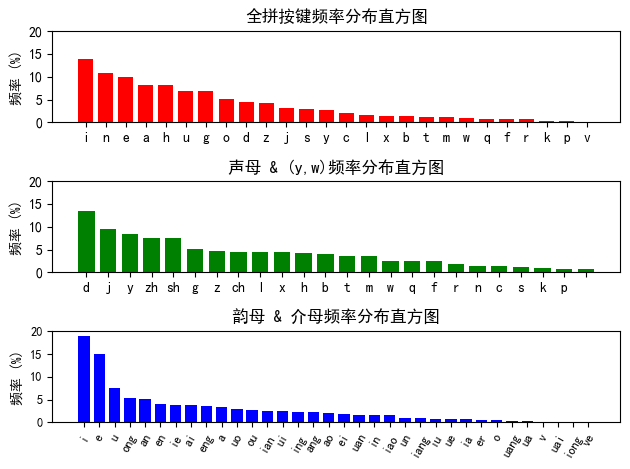

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=1)

axes[0].bar(df_full_f.index, df_full_f.num * 100, width=0.75, color='r')
axes[0].set_title('全拼按键频率分布直方图')
axes[0].set_ylabel("频率 (%)")
axes[0].set_yticks(np.arange(0, 25, 5))
# axes[0].set_title('键频', fontproperties=font)
# axes[0].set_xticklabels(df_full.index, rotation=45)

axes[1].bar(df_initials_f.index, df_initials_f.num * 100, width=0.75, color='g')
axes[1].set_title('声母 & (y,w)频率分布直方图')
axes[1].set_ylabel("频率 (%)")
axes[1].set_yticks(np.arange(0, 25, 5))
# axes[1].set_xticklabels(df_initials.index, rotation=45)

axes[2].bar(df_finals_f.index, df_finals_f.num * 100, width=0.75, color='b')
axes[2].set_title('韵母 & 介母频率分布直方图')
axes[2].set_ylabel("频率 (%)")
axes[2].set_yticks(np.arange(0, 25, 5))
axes[2].xaxis.set_major_locator(ticker.FixedLocator(range(len(df_finals_f))))
axes[2].set_xticklabels(df_finals_f.index, rotation=60)
axes[2].tick_params(labelsize=9)  # 刻度字体大小

fig.tight_layout()  # 紧凑布局
display(fig)

# Step 2 均衡性 & 输入效率

- 要求: 设计评价标准来分别评价使用全拼录入这篇文章时的按键使用均衡性和输入效率（请根据个人理解自行定义，建议使用明确的量化指标）。 
- 输出: 量化评价标准或方法，以及对全拼输入方案的评价结果


## 均衡性

`均衡性`可以由`按键熵`, `手指熵`与`手掌熵`三个指标的加权和表示:
$$
B = A_k \cdot B_k \cdot W_k + A_f \cdot B_f \cdot W_f + A_h \cdot B_h \cdot W_h
$$
- $B$: `均衡性`
- $B_k$: `按键熵`, 使用`各按键实际敲击频率`的熵表示, 衡量按键均匀敲击的程度
    - $B_k \to 0$: 按键实际使用概率分布不均匀
    - $B_k \to 1$: 按键实际使用概率分布均匀
- $B_f$: `手指熵`, 使用`各手指实际敲击频率`的熵表示, 衡量手指均匀敲击的程度
    - $B_f \to 0$: 手指实际使用概率分布不均匀
    - $B_f \to 1$: 手指实际使用概率分布均匀
- $B_h$: `手掌熵`, 使用`各手掌实际使用频率`的熵表示, 衡量手掌均匀敲击的程度
    - $B_h \to 0$: 手掌实际使用概率分布不均匀
    - $B_h \to 1$: 手掌实际使用概率分布均匀
- $A_k$: `按键频率熵归一化系数`, 值为`按键频率熵`最大熵的倒数 $log_2{26}$
- $A_f$: `手指频率熵归一化系数`, 值为`手指频率熵`最大熵的倒数 $log_2{8}$
- $A_h$: `手掌频率熵归一化系数`, 值为`手掌频率熵`最大熵的倒数 $log_2{2}$
- $W_k$: `按键均匀性权重`
- $W_f$: `手指均匀性权重`
- $W_h$: `手掌均匀性权重`

`熵`:
$$
H(p) := -\sum_i{p(i) \log_2{p(i)}}
$$

`交叉熵`:
$$
H(p \parallel q) := - \sum_i{p(i) \log_2{q(i)}}
$$

### 建立按键与手指/手掌的映射

In [9]:
# 按键与手指/手掌的映射

class Key(object):
    """ 按键类 """
    def __init__(self, key, finger, hand, row, column):
        """
        :param: key 按键名称(char)
        :param: finger 标准敲击指法(int)
            0: 左手小指
            1: 左手无名指
            2: 左手中指
            3: 左手食指
            4: 右手小指
            5: 右手无名指
            6: 右手中指
            7: 右手食指
        :param: hand 手掌(int)
            0: 左手
            1: 右手
        :param: row 位置行标(int)
            0~2: 第 1~3 列
        :param: column 位置列表(int)
            0~9: 第 1~10 列
        """
        self.key = key
        self.finger = finger
        self.hand = hand
        self.row = row
        self.column = column


keys = {
    'q': Key('q', 0, 0, 0, 0),
    'w': Key('w', 1, 0, 0, 1),
    'e': Key('e', 2, 0, 0, 2),
    'r': Key('r', 3, 0, 0, 3),
    't': Key('t', 3, 0, 0, 4),
    'y': Key('y', 7, 1, 0, 5),
    'u': Key('u', 7, 1, 0, 6),
    'i': Key('i', 6, 1, 0, 7),
    'o': Key('o', 5, 1, 0, 8),
    'p': Key('p', 4, 1, 0, 9),
    'a': Key('a', 0, 0, 1, 0),
    's': Key('s', 1, 0, 1, 1),
    'd': Key('d', 2, 0, 1, 2),
    'f': Key('f', 3, 0, 1, 3),
    'g': Key('g', 3, 0, 1, 4),
    'h': Key('h', 7, 1, 1, 5),
    'j': Key('j', 7, 1, 1, 6),
    'k': Key('k', 6, 1, 1, 7),
    'l': Key('l', 5, 1, 1, 8),
    'z': Key('z', 0, 0, 2, 0),
    'x': Key('x', 1, 0, 2, 1),
    'c': Key('c', 2, 0, 2, 2),
    'v': Key('v', 3, 0, 2, 3),
    'b': Key('b', 3, 0, 2, 4),
    'n': Key('n', 7, 1, 2, 5),
    'm': Key('m', 7, 1, 2, 6),
}

### 定义熵计算函数

In [10]:
# 熵

def entropy(labels, is_cross=False, base=2):
    """ Computes entropy of label distribution. """

    n_labels = len(labels)

    if n_labels <= 1:
        return 0

    value,counts = np.unique(labels, return_counts=True)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    ent = 0.

    # Compute entropy
    for i in probs:
        ent -= i * log(
            i if not is_cross else 1 / len(probs),
            base,
        )

    return ent


### 定义均衡性计算函数

In [11]:
# 设置归一化系数
A_k = 1 / log(26, 2)
A_f = 1 / log(8, 2)
A_h = 1 / log(2, 2)

# 设置权重
W_k = 1 / 2
W_f = 1 / 4
W_h = 1 / 4

def balanced(key):

    # 计算均衡性指标
    B_k = entropy(key)
    B_f = entropy(list(map(lambda c: keys.get(c).finger, key)))
    B_h = entropy(list(map(lambda c: keys.get(c).hand, key)))

    # 计算均衡性
    B = A_k * B_k * W_k + A_f * B_f * W_f + A_h * B_h * W_h
    return B, B_k, B_f, B_h

### 计算均衡性

In [12]:
B_full, B_k_full, B_f_full, B_h_full = balanced(full_list)
print("均衡性: %f\n按键熵: %f\n手指熵: %f\n手掌熵: %f" % (B_full, B_k_full, B_f_full, B_h_full))

均衡性: 0.897946
按键熵: 4.067694
手指熵: 2.597974
手掌熵: 0.995023


## 输入效率

`输入效率`可分别由`平均单字击键数量`与`平均单字消耗时间`表征

1. **平均单字击键数:**
$$
\bar{N} := \cfrac{N_k}{N_c}
$$
- $\bar{N}$: `平均单字击键数`
- $N_k$: `样本文章击键总数`
- $N_c$: `样本文章总字数`(不含标点符号)

2. **平均单字耗时:**
$$
\bar{T} := \cfrac{\sum_i^{N_k}{F_i \cdot R_i \cdot C_i \cdot H_i \cdot T_0}}{N_c}
$$
- $\bar{T}$: `平均单字耗时`
- $F_i$: `手指修正参数`, 表征不同手指敲击所用时间差异(食指 < 中指 < 无名指 < 小指)
- $R_i$: `键位修正参数(行)`, 表征不同行键位敲击所用时间差异(第2行 < 第1行 < 第3行)
- $C_i$: `键位修正参数(列)`, 表征不同列键位敲击所用时间差异(其他 < `TGB` = `YHN`)
- $H_i$: `手掌修正参数`, 两手交替击键与单手顺次击键所用时间差异(前后两次击键使用不同手 < 前后两次击键使用相同手)
- $T_0$: `单键敲击基本耗时`
- $N_k$: `样本文章击键总数`
- $N_c$: `样本文章总字数`(不含标点符号)

### 计算平均单字击键数

In [13]:
def keystroke(N_k, N_c):
    return N_k / N_c

In [14]:
N_k_full = len(full_list)
N_c = len(full)
N_full = keystroke(N_k_full, N_c)
print("平均单字击键数: %f\n样本文章击键总数: %d\n样本文章总字数: %d" % (N_full, N_k_full, N_c))

平均单字击键数: 2.952491
样本文章击键总数: 53508
样本文章总字数: 18123


### 计算平均单字耗时

In [15]:
# 手指 -> 手指修正参数
finger2F = {
    0: 1.5,  # 小指
    1: 1.25,  # 无名指
    2: 1.125,  # 中指
    3: 1.0,  # 食指
}

# 键位(行) -> 键位(行)修正参数
row2R = {
    0: 1.125,
    1: 1.0,
    2: 1.25,
}

# 键位(列) -> 键位(列)修正参数
column2C = {
    0: 1.0,
    1: 1.0,
    2: 1.0,
    3: 1.0,
    4: 1.125,
    5: 1.125,
    6: 1.0,
    7: 1.0,
    8: 1.0,
    9: 1.0,
}
# 手掌 -> 手掌修正参数
hand2H = lambda old, new: 1.0 if old == new else 0.75

T_0 = 1.0  # 单键敲击基本耗时

# 计算耗时
def timeconsum(key):
    hand_old = keys[key[0]].hand

    t = finger2F[keys[key[0]].finger % 4] \
        * row2R[keys[key[0]].row] \
        * column2C[keys[key[0]].column] \
        * hand2H(hand_old, hand_old) \
        * T_0

    T = t  # 总时间
    for i in range(1, len(key)):
        hand_new = keys[key[i]].hand
        t = finger2F[keys[key[i]].finger % 4] \
            * row2R[keys[key[i]].row] \
            * column2C[keys[key[i]].column] \
            * hand2H(hand_old, hand_new) \
            * T_0
        T += t
        hand_old = hand_new

    T_ave = T / N_c  # 平均单字消耗时间
    return T_ave, T

In [16]:
T_ave_full, T_full = timeconsum(full_list)
print("平均单字耗时: %f\n总耗时: %f" % (T_ave_full, T_full))

平均单字耗时: 3.263177
总耗时: 59138.558594


# Step 3 改进编码方案

- 要求: 基于在`Step 2`中制定的标准，尝试在全拼基础上改进打字编码方案，使得输入该文章时字母键的使用更加均衡、输入更加高效，展示改进的结果并分析。
- 输入: 一篇中文文章（附件文章）
- 输出: 新的打字编码方案、新旧方案在均衡性和输入效率方面的对比


In [17]:
# 绘制不同按键的时间加权
for row in ["qwertyuiop", "asdfghjkl", "zxcvbnm"]:
    for c in row:
        w = finger2F[keys[c].finger % 4] \
            * row2R[keys[c].row] \
            * column2C[keys[c].column]
        print("%.5f" % w, end='\t')
    print('')

1.68750	1.40625	1.26562	1.12500	1.26562	1.26562	1.12500	1.26562	1.40625	1.68750	
1.50000	1.25000	1.12500	1.00000	1.12500	1.12500	1.00000	1.12500	1.25000	
1.87500	1.56250	1.40625	1.25000	1.40625	1.40625	1.25000	


## 分析与改进

### 分析

1. 对比`全拼按键频率分布直方图`, `声母 & (y,w)频率分布直方图` 与 `韵母 & 介母频率分布直方图`, 可以看出相对于全拼与声母, 韵母数量更多且更加集中(例如<kbd>i</kbd>和<kbd>e</kbd>)

2. 根据使用`平均单字消耗时间`作为输入效率量化方案, 可以计算出各按键的权重(`如下表所示`), 其中第一行中的<kbd>E</kbd>, <kbd>R</kbd>, <kbd>T</kbd>, <kbd>Y</kbd>, <kbd>U</kbd>, <kbd>I</kbd>, 第二行中的<kbd>S</kbd>, <kbd>D</kbd>, <kbd>F</kbd>, <kbd>G</kbd>, <kbd>H</kbd>, <kbd>J</kbd>, <kbd>E</kbd>, <kbd>K</kbd>, <kbd>L</kbd>, 第三行中的<kbd>V</kbd>, <kbd>M</kbd>等键均具有较好的输入效率

| 行号  |        第1列         |        第2列         |        第3列         |        第4列         |        第5列         |        第6列         |        第7列         |        第8列         |        第9列         |        第10列        |
| :---: | :------------------: | :------------------: | :------------------: | :------------------: | :------------------: | :------------------: | :------------------: | :------------------: | :------------------: | :------------------: |
| 第1行 | <kbd>Q</kbd> 1.68750 | <kbd>W</kbd> 1.40625 | <kbd>E</kbd> 1.26562 | <kbd>R</kbd> 1.12500 | <kbd>T</kbd> 1.26562 | <kbd>Y</kbd> 1.26562 | <kbd>U</kbd> 1.12500 | <kbd>I</kbd> 1.26562 | <kbd>O</kbd> 1.40625 | <kbd>P</kbd> 1.68750 |
| 第2行 | <kbd>A</kbd> 1.50000 | <kbd>S</kbd> 1.25000 | <kbd>D</kbd> 1.12500 | <kbd>F</kbd> 1.00000 | <kbd>G</kbd> 1.12500 | <kbd>H</kbd> 1.12500 | <kbd>J</kbd> 1.00000 | <kbd>K</kbd> 1.12500 | <kbd>L</kbd> 1.25000 |                      |
| 第3行 | <kbd>Z</kbd> 1.87500 | <kbd>X</kbd> 1.56250 | <kbd>C</kbd> 1.40625 | <kbd>V</kbd> 1.25000 | <kbd>B</kbd> 1.40625 | <kbd>N</kbd> 1.40625 | <kbd>M</kbd> 1.25000 |                      |                      |                      |

3. 分析现有双拼方案(以下图所示`小鹤双拼`为例)
    1. 部分韵母(介母)由于其拼写规则的互斥(如下所示), 合并后并不会使重码率出现上升
        - `üe` & `ue`
        - `o` & `uo`
        - `ong` & `iong`
        - `ing` & `uai`
        - `iang` & `uang`
        - `ia` & `ua`
        - `ü` & `ui`
    2. 特殊音节可使用两个互斥的按键表示(如下所示)
        - `a`: <kbd>A</kbd> <kbd>A</kbd>
        - `ai`: <kbd>A</kbd> <kbd>I</kbd>
        - `an`: <kbd>A</kbd> <kbd>N</kbd>
        - `ang`: <kbd>A</kbd> <kbd>H</kbd>
        - `ao`: <kbd>A</kbd> <kbd>O</kbd>
        - `e`: <kbd>E</kbd> <kbd>E</kbd>
        - `ei`: <kbd>E</kbd> <kbd>I</kbd>
        - `en`: <kbd>E</kbd> <kbd>N</kbd>
        - `er`: <kbd>E</kbd> <kbd>R</kbd>
        - `eng`: <kbd>E</kbd> <kbd>G</kbd>
        - `o`: <kbd>O</kbd> <kbd>O</kbd>
        - `ou`: <kbd>O</kbd> <kbd>U</kbd>
    3. 为了降低学习门槛, 该双拼方案保持大多数声母与单韵母的位置不变, 因此其击键热度图热区并非完全集中于效率最高的键位

![小鹤双拼](images/小鹤双拼.png)
<center>小鹤双拼布局与击键热度图</center>

### 改进

由以上分析结果, 针对全拼与双拼, 先提出两种改进方案
1. `全拼改进方案`: 综合`全拼按键频率分布直方图`与`按键输入效率权重表`, 将高频字母映射至输入效率较高的按键, 以期在保持`按键熵` $B_k$ 不变的条件下提高`手指熵` $B_f$, 进而提高其`均衡性` $B$, 同时提高其使用`平均单字耗时` $\bar{T}$ 表征的`输入效率`
2. `双拼改进方案`: 综合`声母 & (y,w)频率分布直方图`, `韵母 & 介母频率分布直方图`与`小鹤双拼布局与击键热度图`, 在保证不发生按键冲突的前提下, 将高频声母与韵母映射至输入效率较高的按键, 以期同时提高`均衡性` $B$, `平均单字击键数` $\bar{N}$ 与 `平均单字耗时` $\bar{T}$

## 改进方案测试

### 全拼改进方案

In [18]:
# 全拼改进方案映射 原按键 -> 新按键
iQuanPin = {
    "i": "f",
    "n": "j",
    "e": "d",
    "a": "k",
    "h": "h",
    "u": "g",
    "g": "r",
    "o": "u",
    "d": "s",
    "z": "l",
    "j": "v",
    "s": "m",
    "y": "e",
    "c": "i",
    "l": "t",
    "x": "y",
    "b": "w",
    "t": "o",
    "m": "c",
    "w": "n",
    "q": "b",
    "f": "a",
    "r": "x",
    "k": "q",
    "p": "p",
    "v": "z",
}

ifull_list = list(map(lambda c: iQuanPin[c], full_list))

with open('./www/default.html', 'r') as fr:
    default_page = fr.read()
    with open('./www/ifull.html', 'w') as fw:
        fw.write('<div id="inputarea">')
        fw.write('<textarea id="typefield">')
        fw.write(" ".join(ifull_list))
        fw.write('</textarea>')
        fw.write('</div>')
        fw.write(default_page)

#### [改进方案热度图](./www/ifull.html)

In [19]:
IFrame(src='./www/ifull.html', width=810, height=500)

#### 均衡性

In [20]:
B_ifull, B_k_ifull, B_f_ifull, B_h_ifull = balanced(ifull_list)

print("全拼改进前:\n\t均衡性: %f\n\t按键熵: %f\n\t手指熵: %f\n\t手掌熵: %f" % (B_full, B_k_full, B_f_full, B_h_full))
print("全拼改进后:\n\t均衡性: %f\n\t按键熵: %f\n\t手指熵: %f\n\t手掌熵: %f" % (B_ifull, B_k_ifull, B_f_ifull, B_h_ifull))


全拼改进前:
	均衡性: 0.897946
	按键熵: 4.067694
	手指熵: 2.597974
	手掌熵: 0.995023
全拼改进后:
	均衡性: 0.877743
	按键熵: 4.067694
	手指熵: 2.361951
	手掌熵: 0.992884


#### 平均单字击键数

In [21]:
N_k_ifull = len(ifull_list)
N_ifull = keystroke(N_k_ifull, N_c)

print("全拼改进前:\n\t平均单字击键数: %f\n\t样本文章击键总数: %d\n\t样本文章总字数: %d" % (N_full, N_k_full, N_c))
print("全拼改进后:\n\t平均单字击键数: %f\n\t样本文章击键总数: %d\n\t样本文章总字数: %d" % (N_ifull, N_k_ifull, N_c))

全拼改进前:
	平均单字击键数: 2.952491
	样本文章击键总数: 53508
	样本文章总字数: 18123
全拼改进后:
	平均单字击键数: 2.952491
	样本文章击键总数: 53508
	样本文章总字数: 18123


#### 平均单字耗时

In [22]:
T_ave_ifull, T_ifull = timeconsum(ifull_list)

print("全拼改进前:\n\t平均单字耗时: %f\n\t总耗时: %f" % (T_ave_full, T_full))
print("全拼改进后:\n\t平均单字耗时: %f\n\t总耗时: %f" % (T_ave_ifull, T_ifull))

全拼改进前:
	平均单字耗时: 3.263177
	总耗时: 59138.558594
全拼改进后:
	平均单字耗时: 3.000504
	总耗时: 54378.140625


### 小鹤双拼方案

In [23]:
# 小鹤方案映射 音节 -> 按键
xiaoHe = {
    "d": "d",
    "j": "j",
    "y": "y",
    "zh": "v",
    "sh": "u",
    "g": "g",
    "z": "z",
    "ch": "i",
    "l": "l",
    "x": "x",
    "h": "h",
    "b": "b",
    "t": "t",
    "m": "m",
    "w": "w",
    "q": "q",
    "f": "f",
    "r": "r",
    "n": "n",
    "c": "c",
    "s": "s",
    "k": "k",
    "p": "p",
    "": "",
    "i": "i",
    "e": "e",
    "u": "u",
    "ong": "s",
    "an": "j",
    "en": "f",
    "ie": "p",
    "ai": "d",
    "eng": "g",
    "a": "a",
    "uo": "o",
    "ou": "z",
    "ian": "m",
    "ui": "v",
    "ing": "k",
    "ang": "h",
    "ao": "c",
    "ei": "w",
    "uan": "r",
    "in": "b",
    "iao": "n",
    "un": "y",
    "iang": "l",
    "iu": "q",
    "ue": "t",
    "ia": "x",
    "er": "er",
    "o": "o",
    "uang": "l",
    "ua": "x",
    "v": "v",
    "uai": "k",
    "iong": "s",
    "ve": "t",
}

xiaoHeSpecial = {
    "a": "aa",
    "ai": "ai",
    "an": "an",
    "ang": "ah",
    "ao": "ao",
    "e": "ee",
    "ei": "ei",
    "en": "en",
    "er": "er",
    "eng": "eg",
    "o": "oo",
    "ou": "ou",
}

def full2xiaohe(t):
    if t[0] == "":
        return xiaoHeSpecial[t[1]]
    else:
        return xiaoHe[t[0]] + xiaoHe[t[1]]

xiaohe = list(map(full2xiaohe, zip(initials, finals)))

with open('./www/default.html', 'r') as fr:
    default_page = fr.read()
    with open('./www/xiaohe.html', 'w') as fw:
        fw.write('<div id="inputarea">')
        fw.write('<textarea id="typefield">')
        fw.write(" ".join(xiaohe))
        fw.write('</textarea>')
        fw.write('</div>')
        fw.write(default_page)

xiaohe_list = list("".join(xiaohe))

#### [改进方案热度图](./www/xiaohe.html)

In [24]:
IFrame(src='./www/xiaohe.html', width=810, height=500)

#### 均衡性

In [25]:
B_xiaohe, B_k_xiaohe, B_f_xiaohe, B_h_xiaohe = balanced(xiaohe_list)

print("全拼改进前:\n\t均衡性: %f\n\t按键熵: %f\n\t手指熵: %f\n\t手掌熵: %f" % (B_full, B_k_full, B_f_full, B_h_full))
print("全拼改进后:\n\t均衡性: %f\n\t按键熵: %f\n\t手指熵: %f\n\t手掌熵: %f" % (B_ifull, B_k_ifull, B_f_ifull, B_h_ifull))

print("双拼改进前:\n\t均衡性: %f\n\t按键熵: %f\n\t手指熵: %f\n\t手掌熵: %f" % (B_xiaohe, B_k_xiaohe, B_f_xiaohe, B_h_xiaohe))

全拼改进前:
	均衡性: 0.897946
	按键熵: 4.067694
	手指熵: 2.597974
	手掌熵: 0.995023
全拼改进后:
	均衡性: 0.877743
	按键熵: 4.067694
	手指熵: 2.361951
	手掌熵: 0.992884
双拼改进前:
	均衡性: 0.944259
	按键熵: 4.420238
	手指熵: 2.694713
	手掌熵: 0.998021


#### 平均单字击键数

In [26]:
N_k_xiaohe = len(xiaohe_list)
N_xiaohe = keystroke(N_k_xiaohe, N_c)

print("全拼改进前:\n\t平均单字击键数: %f\n\t样本文章击键总数: %d\n\t样本文章总字数: %d" % (N_full, N_k_full, N_c))
print("全拼改进后:\n\t平均单字击键数: %f\n\t样本文章击键总数: %d\n\t样本文章总字数: %d" % (N_ifull, N_k_ifull, N_c))

print("双拼改进前:\n\t平均单字击键数: %f\n\t样本文章击键总数: %d\n\t样本文章总字数: %d" % (N_xiaohe, N_k_xiaohe, N_c))

全拼改进前:
	平均单字击键数: 2.952491
	样本文章击键总数: 53508
	样本文章总字数: 18123
全拼改进后:
	平均单字击键数: 2.952491
	样本文章击键总数: 53508
	样本文章总字数: 18123
双拼改进前:
	平均单字击键数: 2.000000
	样本文章击键总数: 36246
	样本文章总字数: 18123


#### 平均单字耗时

In [27]:
T_ave_xiaohe, T_xiaohe = timeconsum(xiaohe_list)

print("全拼改进前:\n\t平均单字耗时: %f\n\t总耗时: %f" % (T_ave_full, T_full))
print("全拼改进后:\n\t平均单字耗时: %f\n\t总耗时: %f" % (T_ave_ifull, T_ifull))

print("双拼改进前:\n\t平均单字耗时: %f\n\t总耗时: %f" % (T_ave_xiaohe, T_xiaohe))

全拼改进前:
	平均单字耗时: 3.263177
	总耗时: 59138.558594
全拼改进后:
	平均单字耗时: 3.000504
	总耗时: 54378.140625
双拼改进前:
	平均单字耗时: 2.240133
	总耗时: 40597.937500


### 小鹤双拼改进方案

In [28]:
# 小鹤改进方案映射 原按键 -> 新按键

iXiaoHe = {
    "i": "f",
    "u": "j",
    "d": "d",
    "e": "k",
    "j": "h",
    "y": "g",
    "v": "r",
    "g": "u",
    "h": "s",
    "l": "l",
    "x": "v",
    "m": "m",
    "z": "e",
    "b": "i",
    "f": "t",
    "w": "y",
    "s": "w",
    "k": "o",
    "r": "c",
    "t": "n",
    "c": "b",
    "o": "a",
    "a": "x",
    "q": "q",
    "n": "p",
    "p": "z",
}

ixiaohe = list(map(lambda t: iXiaoHe[t[0]] + iXiaoHe[t[1]], zip(xiaohe_list[0::2], xiaohe_list[1::2])))

with open('./www/default.html', 'r') as fr:
    default_page = fr.read()
    with open('./www/ixiaohe.html', 'w') as fw:
        fw.write('<div id="inputarea">')
        fw.write('<textarea id="typefield">')
        fw.write(" ".join(ixiaohe))
        fw.write('</textarea>')
        fw.write('</div>')
        fw.write(default_page)

ixiaohe_list = list("".join(ixiaohe))

#### [改进方案热度图](./www/ixiaohe.html)


In [29]:
IFrame(src='./www/ixiaohe.html', width=810, height=500)

#### 均衡性

In [30]:
B_ixiaohe, B_k_ixiaohe, B_f_ixiaohe, B_h_ixiaohe = balanced(ixiaohe_list)

print("全拼改进前:\n\t均衡性: %f\n\t按键熵: %f\n\t手指熵: %f\n\t手掌熵: %f" % (B_full, B_k_full, B_f_full, B_h_full))
print("全拼改进后:\n\t均衡性: %f\n\t按键熵: %f\n\t手指熵: %f\n\t手掌熵: %f" % (B_ifull, B_k_ifull, B_f_ifull, B_h_ifull))

print("双拼改进前:\n\t均衡性: %f\n\t按键熵: %f\n\t手指熵: %f\n\t手掌熵: %f" % (B_xiaohe, B_k_xiaohe, B_f_xiaohe, B_h_xiaohe))
print("双拼改进后:\n\t均衡性: %f\n\t按键熵: %f\n\t手指熵: %f\n\t手掌熵: %f" % (B_ixiaohe, B_k_ixiaohe, B_f_ixiaohe, B_h_ixiaohe))

全拼改进前:
	均衡性: 0.897946
	按键熵: 4.067694
	手指熵: 2.597974
	手掌熵: 0.995023
全拼改进后:
	均衡性: 0.877743
	按键熵: 4.067694
	手指熵: 2.361951
	手掌熵: 0.992884
双拼改进前:
	均衡性: 0.944259
	按键熵: 4.420238
	手指熵: 2.694713
	手掌熵: 0.998021
双拼改进后:
	均衡性: 0.932026
	按键熵: 4.420238
	手指熵: 2.584392
	手掌熵: 0.985862


#### 平均单字击键数

In [31]:
N_k_ixiaohe = len(ixiaohe_list)
N_ixiaohe = keystroke(N_k_ixiaohe, N_c)

print("全拼改进前:\n\t平均单字击键数: %f\n\t样本文章击键总数: %d\n\t样本文章总字数: %d" % (N_full, N_k_full, N_c))
print("全拼改进后:\n\t平均单字击键数: %f\n\t样本文章击键总数: %d\n\t样本文章总字数: %d" % (N_ifull, N_k_ifull, N_c))

print("双拼改进前:\n\t平均单字击键数: %f\n\t样本文章击键总数: %d\n\t样本文章总字数: %d" % (N_xiaohe, N_k_xiaohe, N_c))
print("双拼改进后:\n\t平均单字击键数: %f\n\t样本文章击键总数: %d\n\t样本文章总字数: %d" % (N_ixiaohe, N_k_ixiaohe, N_c))

全拼改进前:
	平均单字击键数: 2.952491
	样本文章击键总数: 53508
	样本文章总字数: 18123
全拼改进后:
	平均单字击键数: 2.952491
	样本文章击键总数: 53508
	样本文章总字数: 18123
双拼改进前:
	平均单字击键数: 2.000000
	样本文章击键总数: 36246
	样本文章总字数: 18123
双拼改进后:
	平均单字击键数: 2.000000
	样本文章击键总数: 36246
	样本文章总字数: 18123


#### 平均单字耗时

In [32]:
T_ave_ixiaohe, T_ixiaohe = timeconsum(ixiaohe_list)

print("全拼改进前:\n\t平均单字耗时: %f\n\t总耗时: %f" % (T_ave_full, T_full))
print("全拼改进后:\n\t平均单字耗时: %f\n\t总耗时: %f" % (T_ave_ifull, T_ifull))

print("双拼改进前:\n\t平均单字耗时: %f\n\t总耗时: %f" % (T_ave_xiaohe, T_xiaohe))
print("双拼改进后:\n\t平均单字耗时: %f\n\t总耗时: %f" % (T_ave_ixiaohe, T_ixiaohe))

全拼改进前:
	平均单字耗时: 3.263177
	总耗时: 59138.558594
全拼改进后:
	平均单字耗时: 3.000504
	总耗时: 54378.140625
双拼改进前:
	平均单字耗时: 2.240133
	总耗时: 40597.937500
双拼改进后:
	平均单字耗时: 2.108291
	总耗时: 38208.562500


## 测试结果分析

|    方案    |  均衡性  |  按键熵  |  手指熵  |  手掌熵  | 平均单字击键数 | 击键总数 | 样本字数 | 平均单字耗时 |    总耗时    |
| :--------: | :------: | :------: | :------: | :------: | :------------: | :------: | :------: | :----------: | :----------: |
| 全拼改进前 | 0.897946 | 4.067694 | 2.597974 | 0.995023 |    2.952491    |  53508   |  18123   |   3.263177   | 59138.558594 |
| 全拼改进后 | 0.877743 | 4.067694 | 2.361951 | 0.992884 |    2.952491    |  53508   |  18123   |   3.000504   | 54378.140625 |
| 双拼改进前 | 0.944259 | 4.420238 | 2.694713 | 0.998021 |    2.000000    |  36246   |  18123   |   2.240133   | 40597.937500 |
| 双拼改进后 | 0.932026 | 4.420238 | 2.584392 | 0.985862 |    2.000000    |  36246   |  18123   |   2.108291   | 38208.562500 |

1. 对比全拼改进前后与双拼改进前后的测试结果:
    - 通过更改键盘按键布局对`平均单字耗时`衡量的输入效率具有一定的提升, 但是不影响`平均单字击键数`
    - 通过更改键盘按键布局对方案的`按键熵`无影响, 对`手掌熵`影响有限, 而`手指熵`会显著降低, 进而导致`均衡性`也随之降低, 针对对同一种方案改进前后, `均衡性`与`输入效率`可能存在一定的负相关, 即按键击键越均衡输入效率反而会下降
2. 对比全拼与双拼的测试结果:
    - 双拼方案可以有效提高`均衡性`与`输入效率`

# 参考资料

1. [Keyboard Heatmap | Realtime heatmap visualization of text character distribution](https://www.patrick-wied.at/projects/heatmap-keyboard/)
0. [双拼布局的统计计算](https://tiansh.github.io/lqbz/sp/)
0. [GitHub - tiansh/lqbz: 乱七八糟——堆一些奇怪的东西](https://github.com/tiansh/lqbz)
0. [heatmap.js : Dynamic Heatmaps for the Web](https://www.patrick-wied.at/static/heatmapjs/)
0. [GitHub - pa7/heatmap.js: 🔥 JavaScript Library for HTML5 canvas based heatmaps](https://github.com/pa7/heatmap.js)
0. [python使用matplotlib画词频分析的图_如何使用matplotlib或任何其他库创建词频图_weixin_39746652的博客-CSDN博客](https://blog.csdn.net/weixin_39746652/article/details/113969749)
0. [python画频率直方图_字母频率：绘制一个直方图，按PYTHON的值排序_weixin_39526459的博客-CSDN博客](https://blog.csdn.net/weixin_39526459/article/details/109970976)
0. [Matplotlib中柱状图bar使用 - 1直在路上1 - 博客园](https://www.cnblogs.com/always-fight/p/9707727.html)
0. [numpy - Fastest way to compute entropy in Python - Stack Overflow](https://stackoverflow.com/questions/15450192/fastest-way-to-compute-entropy-in-python)
0. [API — pypinyin 0.42.0 文档](https://pypinyin.readthedocs.io/zh_CN/master/api.html)
0. [LaTeX公式手册(全网最全) - 樱花赞 - 博客园](https://www.cnblogs.com/1024th/p/11623258.html)
0. [介母（拼音符号及组合特点）_百度百科](https://baike.baidu.com/item/%E4%BB%8B%E6%AF%8D/4028328)
0. [汉语拼音方案 - 中华人民共和国教育部政府门户网站](http://www.moe.gov.cn/jyb_sjzl/ziliao/A19/195802/t19580201_186000.html)
0. [python-pinyin/test_standard.py at master · mozillazg/python-pinyin](https://github.com/mozillazg/python-pinyin/blob/master/tests/test_standard.py)
0. [小鹤双拼·小鹤音形 - 官方网站](https://www.flypy.com/)
0. [Python格式化字符串 - 田小计划 - 博客园](https://www.cnblogs.com/wilber2013/p/4641616.html)
